<center><h1><strong>Tarea 3 - Máquinas de Aprendizaje</strong></h1></center>
<center><h3> Juan Pablo Castillo Vera &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 201204595-9 </h3></center>
<center><h3> Álvaro Rodrigo Rojas Valenzuela &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 201073555-9</h3></center>



## 1. Introducción

En la siguiente tarea se realizará un estudio de: 
 
1. Manipulación de dataframes en pandas.
2. Pre-procesamiento de datos y extracción de características.
3. SVMs no-lineales en sklearn.
4. Arboles de clasificación en sklearn.
5. Redes Neuronales feed-forward en keras.
6. Ensamblados de máquinas de aprendizaje en sklearn.
7. Selección de hiper-parámetros estructurales vía validación cruzada.


## 2. Desarrollo

## 2.1 El Viejo XOR: Métodos No-lineales para Problemas No-lineales

En esta sección se tiene el objetivo de experimentar con algunos modelos no-lineales sobre un problema de juguete, el cual es bastante famoso en la historia del aprendizaje automático, este es el problema XOR. Se trata de un problema de clasificación linealmente inseparable. En este problema se utilizará distintos modelos no-lineales para analizar su efectividad en clasificar las clases en este problema.

Para esto se realizaron los siguientes pasos:
### 2.1.a. Función para generación de datos aleatorios XOR.

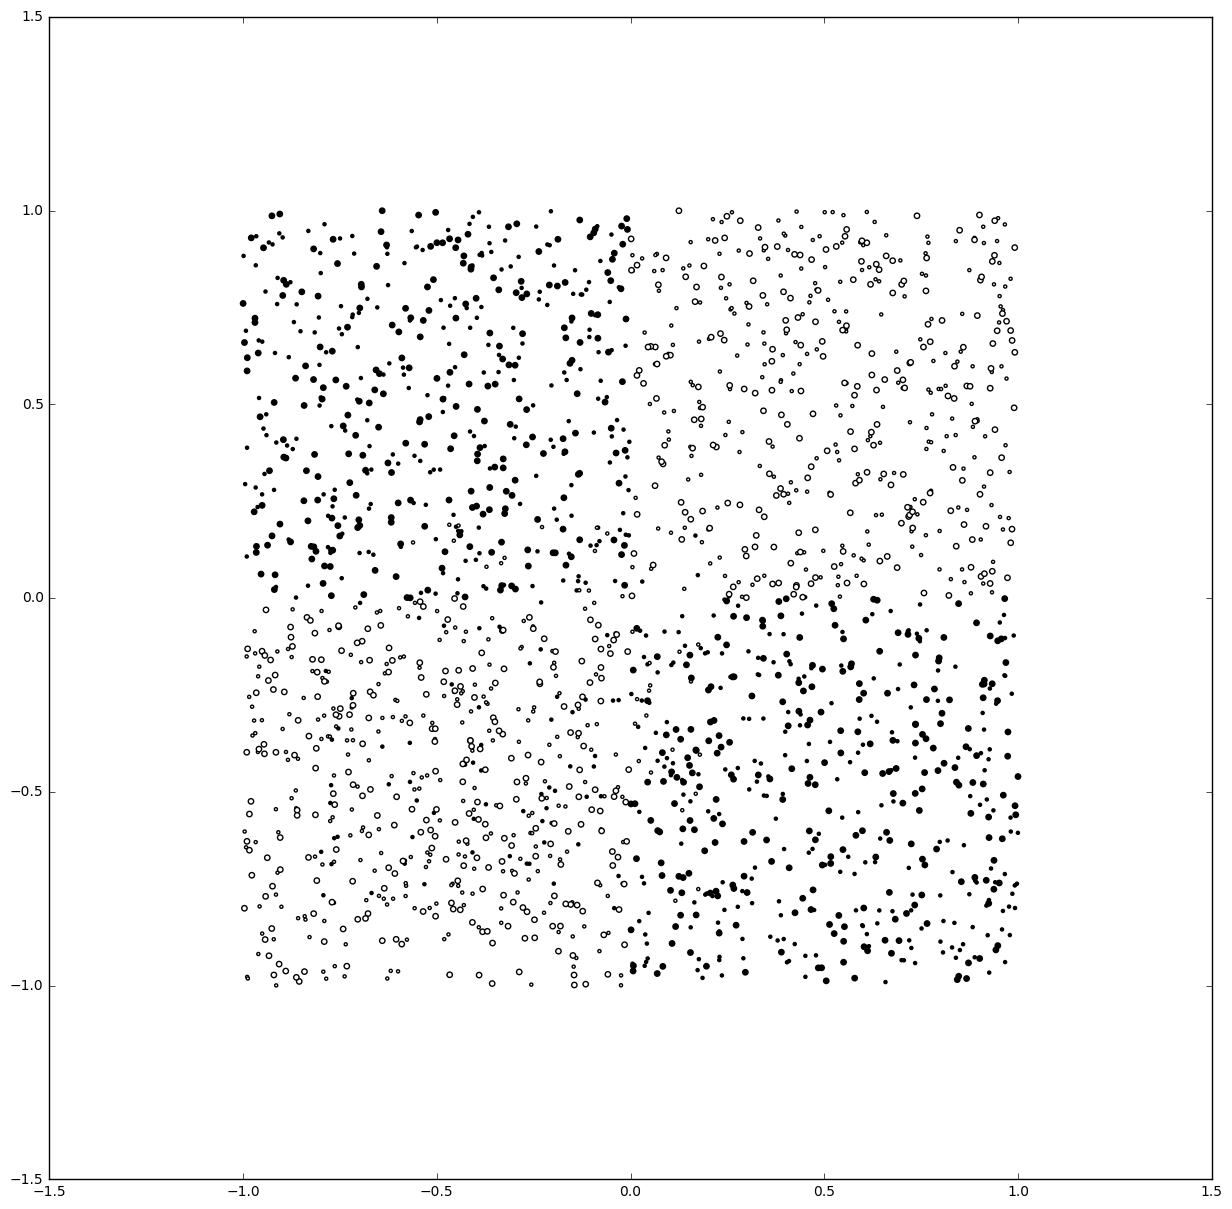

In [7]:
#1.a
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def do_XOR(n=1000,noisy_n=100,svm=False):
        rng = np.random.RandomState(0)
        X_train = rng.uniform(low=-1.0,high=1.0,size=(n,2))
        Y_train = np.logical_xor(X_train[:,0] > 0, X_train[:,1] > 0)
        Y_train = 2*Y_train-1 if svm else Y_train
        X_noisy= rng.uniform(low=-0.8,high=0.2,size=(noisy_n,2))
        Y_noisy = -1*np.logical_xor(X_noisy[:,0] > 0, X_noisy[:,1] > 0) + 1
        Y_noisy = 2*Y_noisy-1 if svm else Y_noisy
        X_train = np.vstack((X_train, X_noisy))
        Y_train = np.hstack((Y_train, Y_noisy))
        X_test = rng.uniform(low=-1.0,high=1.0,size=(n,2))
        Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
        Y_test = 2*Y_test - 1 if svm else Y_test
        return X_train,Y_train,X_test,Y_test

X_train,Y_train,X_test,Y_test = do_XOR()

f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(15, 15))
axis.scatter(X_train[:,0],X_train[:,1],s=5,c=Y_train,zorder=10,cmap='Greys')
axis.scatter(X_test[:,0],X_test[:,1],s=15,c=Y_test,zorder=10,cmap='Greys')
XX, YY = np.mgrid[-1:1:200j, -1:1:200j]
plt.show()

Como puede notarse en el gráfico, una clase se encuentra en el cuadrante 1 y 3, mientras que la otra clase se encuentra en el cuadrante 2 y 4. Tiene sentido que este problema se le llame XOR, debido a que una clase se encuentra cuando los valores (x,y) tienen el mismo signo, en cambio sí tienen distintos signos, serán de la otra clase, esto es similar al concepto de un "or exclusivo", donde se tiene un valor 1 sólo cuando x e y son distintos. Pero si son iguales, se tendrá un valor 0.

### 2.1.b. Prueba de clasificación con una SVM lineal con distintos parámetros. 

Mejor parámetro de regularización C: 0.01
Mejor Accuracy de Test: 0.471000
Training Accuracy SVM Lineal: 0.517273
Test Accuracy SVM Lineal: 0.471000
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         -1       0.46      0.47      0.46       489
         +1       0.48      0.48      0.48       511

avg / total       0.47      0.47      0.47      1000

Grafico de clasificacion de SVM Lineal con C = 0.010000


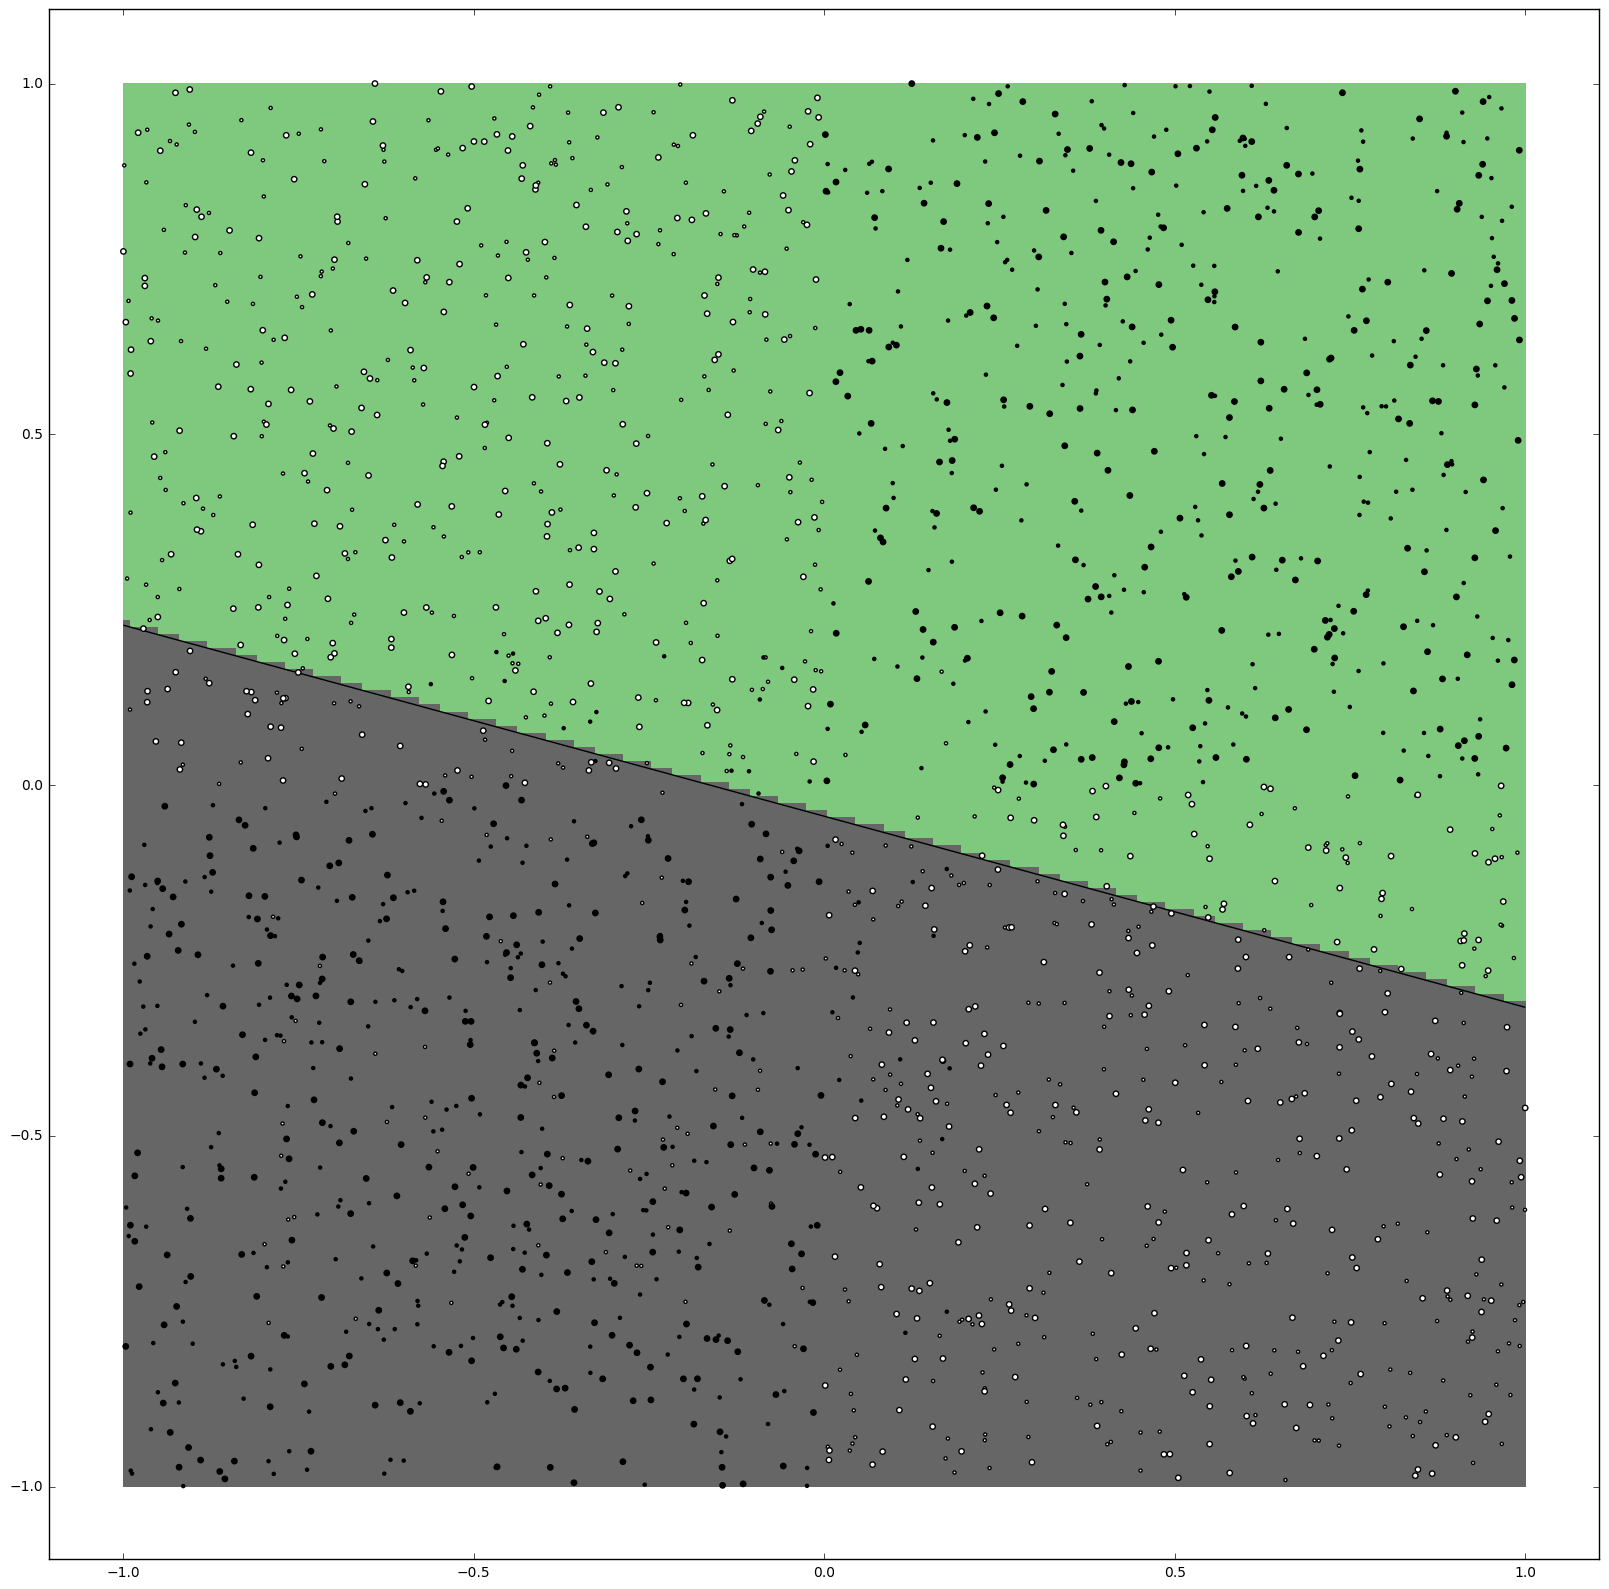

In [8]:
#1.b
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
%matplotlib inline

def score_the_model(model, x, y, xt, yt, text):
    acc_tr = model.score(x, y)
    acc_test = model.score(xt, yt)
    print "Training Accuracy %s: %f"%(text, acc_tr)
    print "Test Accuracy %s: %f"%(text, acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['-1','+1']))

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(20, 20))
    axis.scatter(X_train[:,0],X_train[:,1],s=5,c=Y_train,zorder=10,cmap='gray')
    axis.scatter(X_test[:,0],X_test[:,1],s=15,c=Y_test,zorder=10,cmap='gray')
    XX, YY = np.mgrid[-1:1:200j, -1:1:200j]
    if model_type == 'svm':
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    elif model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
        
    mcolor = plt.cm.Accent
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0 if model_type == 'svm' else Z > 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap=mcolor)
    axis.contour(XX, YY, Z, alpha=1, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'],levels=[-1, 0, 1])
    plt.show()
 
Cs = np.logspace(-2, 3,base=10)

acc_train = []
acc_test = []

for C in Cs:
    clf1 = LinearSVC(C=0.01)
    clf1 = clf1.fit(X_train, Y_train)
    acc_train.append(clf1.score(X_train,Y_train))
    acc_test.append(clf1.score(X_test, Y_test))
    C_best = Cs[acc_test.index(max(acc_test))]
    

print "Mejor parámetro de regularización C: %s"%(C_best)
print "Mejor Accuracy de Test: %f"%(max(acc_test))
clf1 = LinearSVC(C=C_best)
clf1 = clf1.fit(X_train, Y_train)
score_the_model(clf1,X_train,Y_train,X_test,Y_test,'SVM Lineal')
print "Grafico de clasificacion de SVM Lineal con C = %f"%(C_best)
plot_classifier(clf1,X_train,Y_train,X_test,Y_test,'svm')

Como puede notarse, el mejor C encontrado fue 0.01, el cual no logra clasificar satisfactoriamente el problema XOR, esto es debido que este clasificador siempre separada las clases linealmente y este problema es linealmente inseparable.

Por otro lado, se deja implementada en esta pregunta un método para generar metricos y otro metodo para graficar los resultados de los distintos modelos que se utilizara en esta sección.
 

### 2.1.c. Prueba de clasificación con SVM con kernels no-lineales con distintos parámetros. 

Mejor parámetro de regularización C: 8
Mejor Accuracy de Test: 0.972000
Training Accuracy SVM con kernel rbf: 0.902727
Test Accuracy SVM con kernel rbf: 0.972000
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         -1       0.99      0.95      0.97       489
         +1       0.95      0.99      0.97       511

avg / total       0.97      0.97      0.97      1000

Grafico de clasificacion de SVM con kernel rbf con C = 8.000000


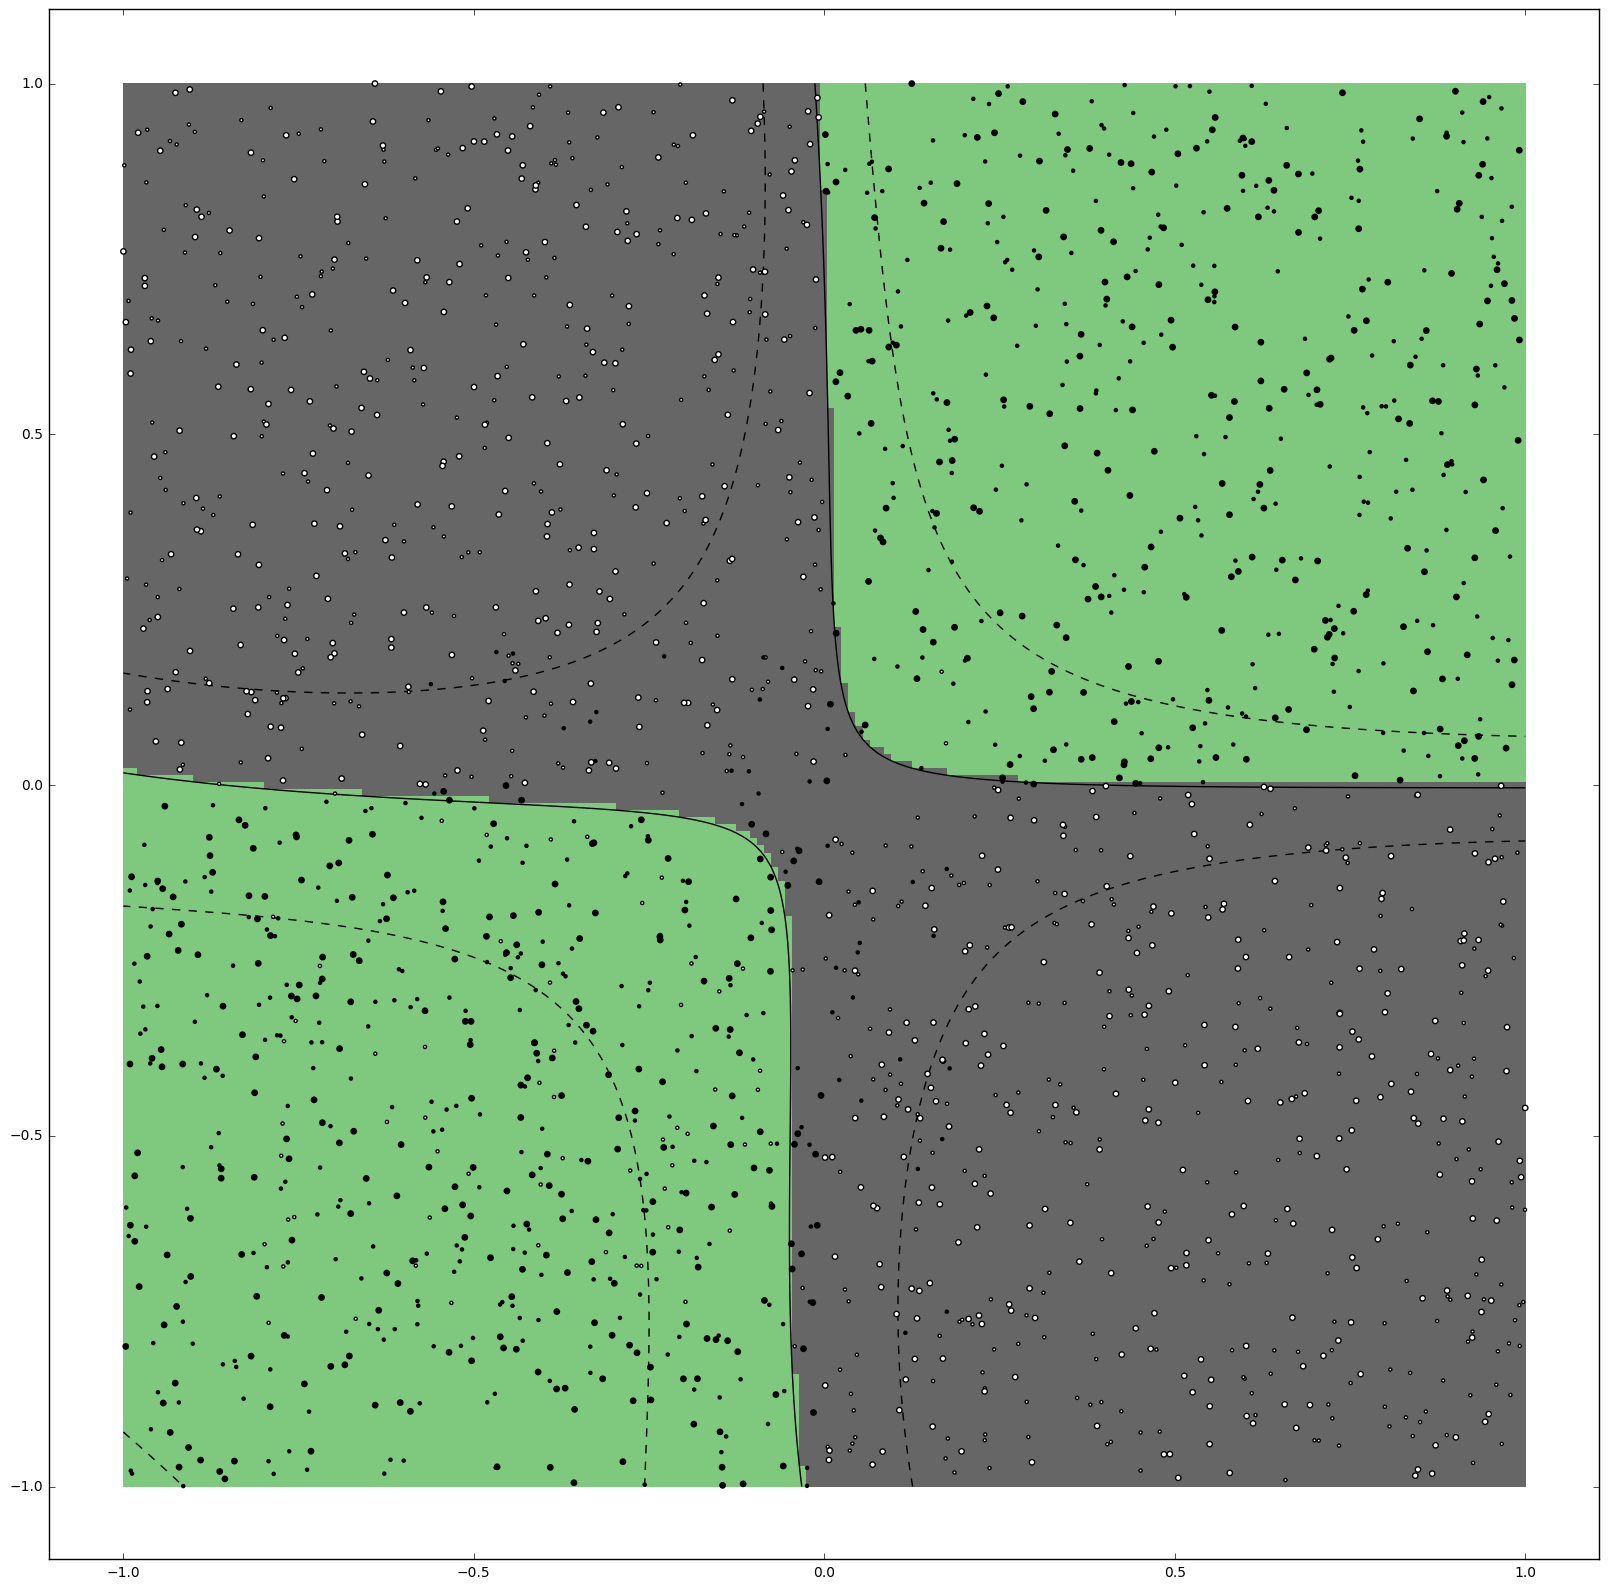

In [9]:
#1.c
from sklearn.svm import SVC
%matplotlib inline

Cs = [0.25, 0.5, 1, 2, 4, 8, 16]

SVM_train_rbf = []
SVM_test_rbf = []

for C in Cs:
    clf1 = SVC(C=C, kernel='rbf')
    clf1.fit(X_train, Y_train)
    SVM_train_rbf.append(clf1.score(X_train,Y_train))
    SVM_test_rbf.append(clf1.score(X_test,Y_test))
    C_best = Cs[SVM_test_rbf.index(max(SVM_test_rbf))]
    
print "Mejor parámetro de regularización C: %s"%(C_best)
print "Mejor Accuracy de Test: %f"%(max(SVM_test_rbf))
clf1 = SVC(C=C_best, kernel='rbf')
clf1.fit(X_train, Y_train)
score_the_model(clf1,X_train,Y_train,X_test,Y_test,'SVM con kernel rbf')
print "Grafico de clasificacion de SVM con kernel rbf con C = %f"%(C_best)
plot_classifier(clf1,X_train,Y_train,X_test,Y_test,'svm')

Mejor parámetro de regularización C: 8
Mejor Accuracy de Test: 0.955000
Training Accuracy SVM con kernel Polinomial: 0.887273
Test Accuracy SVM con kernel Polinomial: 0.955000
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         -1       0.99      0.92      0.95       489
         +1       0.93      0.99      0.96       511

avg / total       0.96      0.95      0.95      1000

Grafico de clasificacion de SVM con kernel Polinomial con C = 8.000000


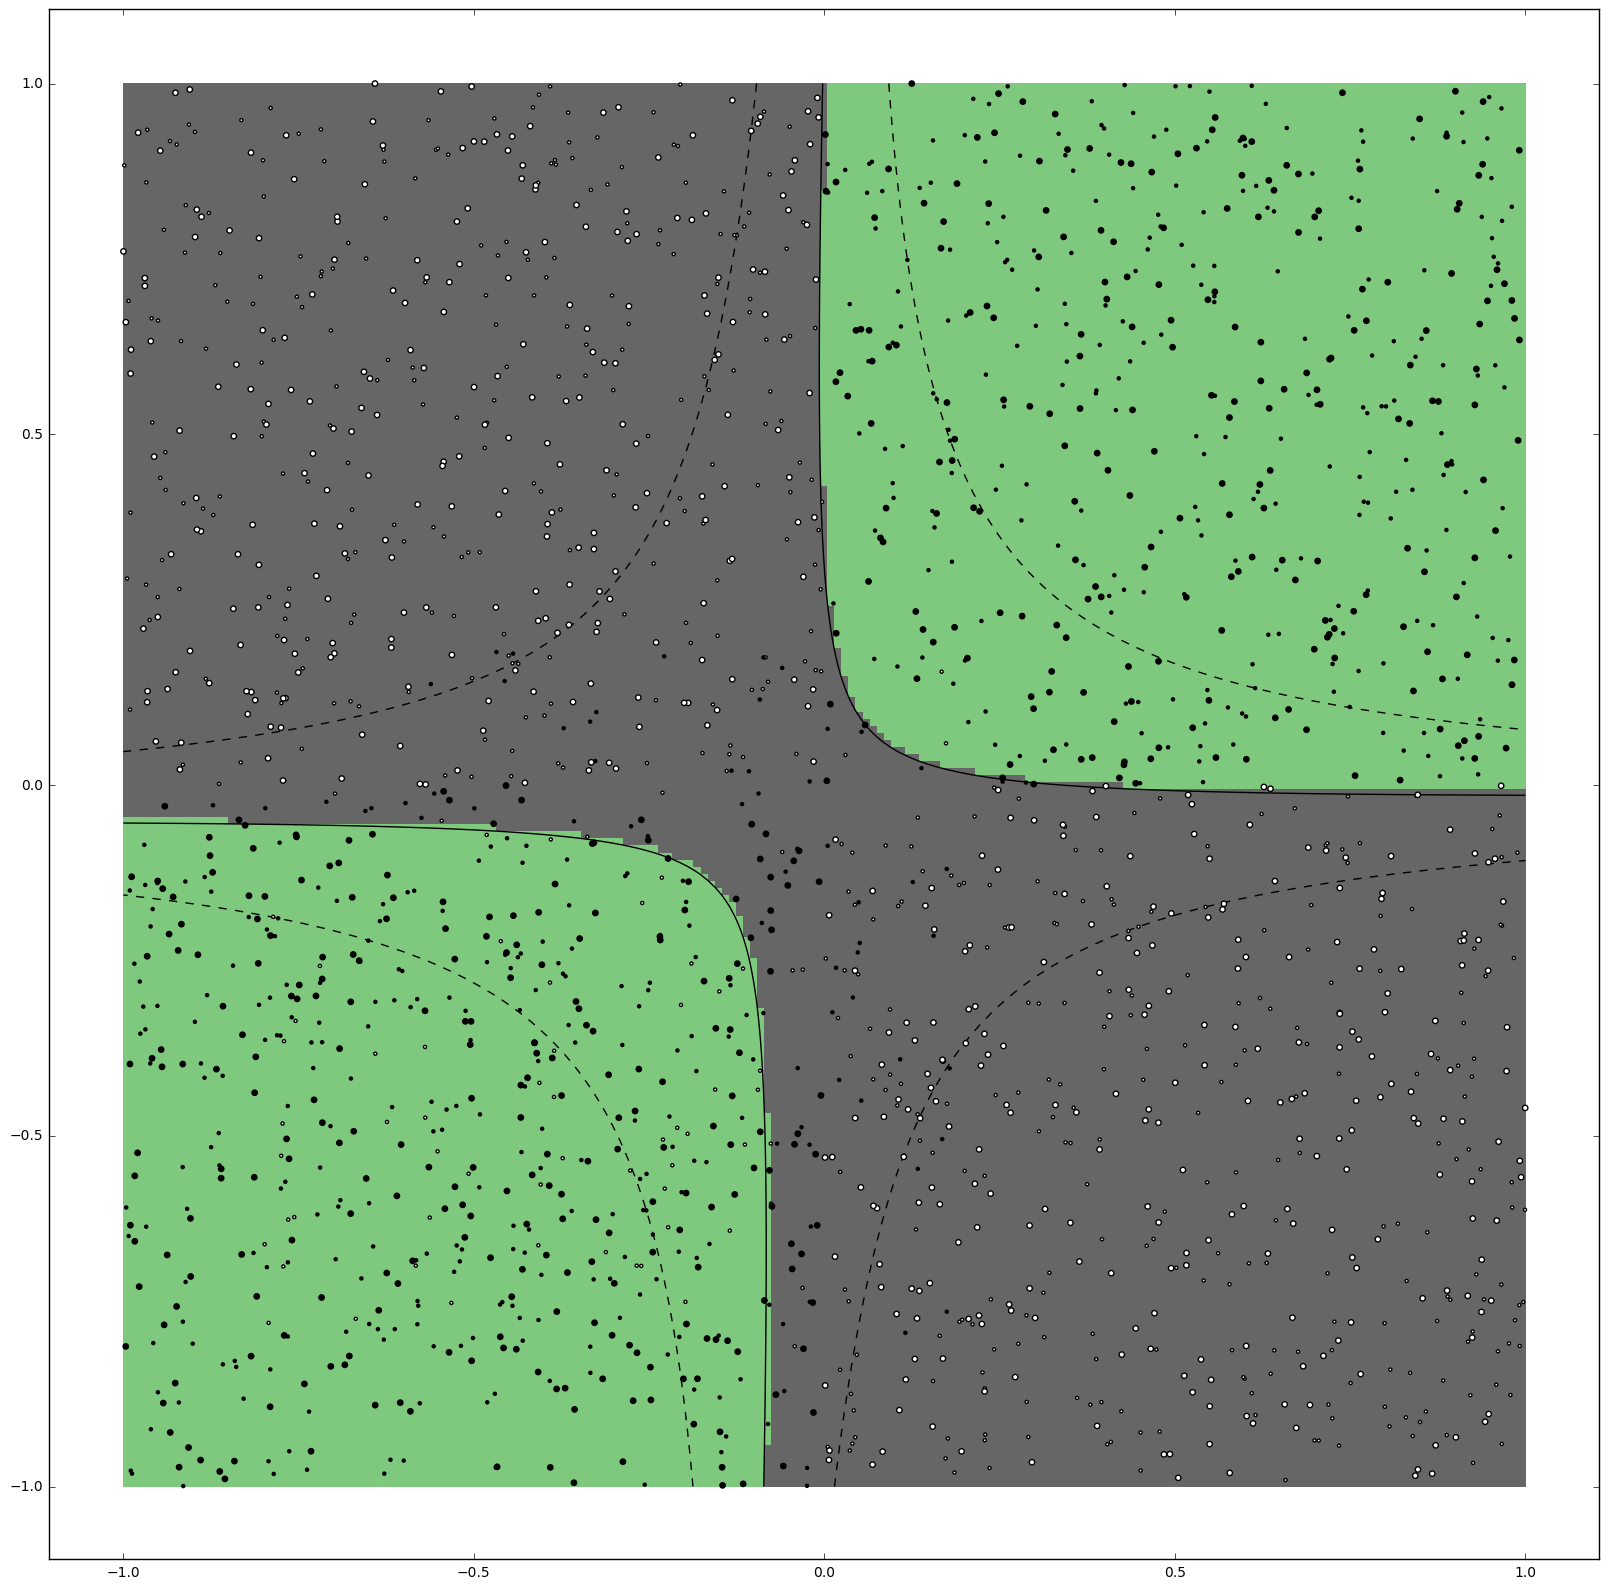

In [10]:
SVM_train_poly = []
SVM_test_poly = []

Cs = [0.25, 0.5, 1, 2, 4, 8, 16]

for C in Cs:
    clf2 = SVC(C=C, kernel='poly',degree=2, coef0=1)
    clf2.fit(X_train, Y_train)
    SVM_train_poly.append(clf2.score(X_train,Y_train))
    SVM_test_poly.append(clf2.score(X_test,Y_test))
    C_best = Cs[SVM_test_poly.index(max(SVM_test_poly))]
    
print "Mejor parámetro de regularización C: %s"%(C_best)
print "Mejor Accuracy de Test: %f"%(max(SVM_test_poly))
clf2 = SVC(C=C_best, kernel='poly',degree=2, coef0=1)
clf2.fit(X_train, Y_train)
score_the_model(clf2,X_train,Y_train,X_test,Y_test,'SVM con kernel Polinomial')
print "Grafico de clasificacion de SVM con kernel Polinomial con C = %f"%(C_best)
plot_classifier(clf2,X_train,Y_train,X_test,Y_test,'svm')

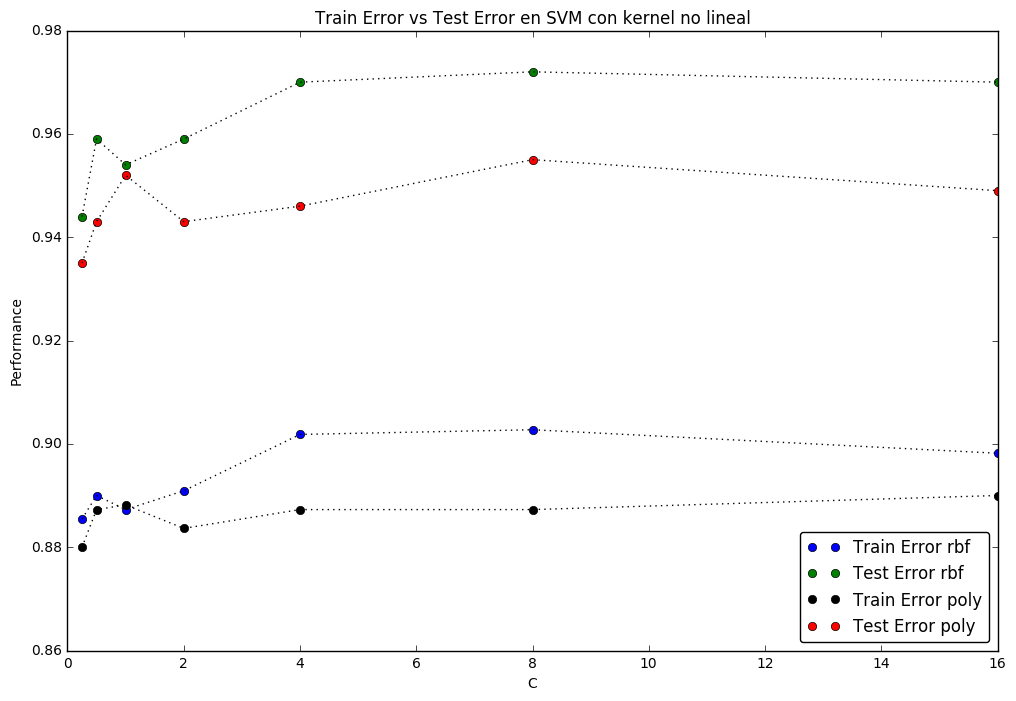

In [11]:
#1.c graficos train error vs test error con los 2 kernels
plt.figure(figsize=(12, 8))
plt.plot(Cs,SVM_train_rbf,'bo', label="Train Error rbf")
plt.plot(Cs,SVM_train_rbf,'k:')
plt.plot(Cs,SVM_test_rbf,'go', label="Test Error rbf")
plt.plot(Cs,SVM_test_rbf,'k:')
plt.plot(Cs,SVM_train_poly,'ko', label="Train Error poly")
plt.plot(Cs,SVM_train_poly,'k:')
plt.plot(Cs,SVM_test_poly,'ro', label="Test Error poly")
plt.plot(Cs,SVM_test_poly,'k:')
plt.xlabel('C')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en SVM con kernel no lineal')
leg = plt.legend(loc='lower right', fancybox=True)
plt.show()

Como puede notarse luego de entrenar varios modelos SVM con kernels rbf y polinomiales, el grafico de los errores muestra que SVM con kernel rbf mejora su accuracy al aumentar su parametro C que tomaba los valores [0.25, 0.5, 1, 2, 4, 8, 16], la mejora del accuracy ocurre hasta cuando C toma un valor de 8, el cual corresponde al valor con mejor accuracy tanto para el training set como el testing set. Por otro lado, al entrenar una SVM con kernel polinomial, el mejor accuracy encontrado para el testing set fue con $C=8$. Por lo tanto paro ambos metodos de clasificacion no lineales. 

### 2.1.d. Prueba de clasificación con una red neuronal artificial de 1 sola neurona.

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Entrenando la red neuronal de 1 neurona...
 960/1000 [===========================>..] - ETA: 0s
Test Accuracy = 0.477000
Grafico del resultado de la red neuronal de 1 neurona con funcion de activacion sigmoid


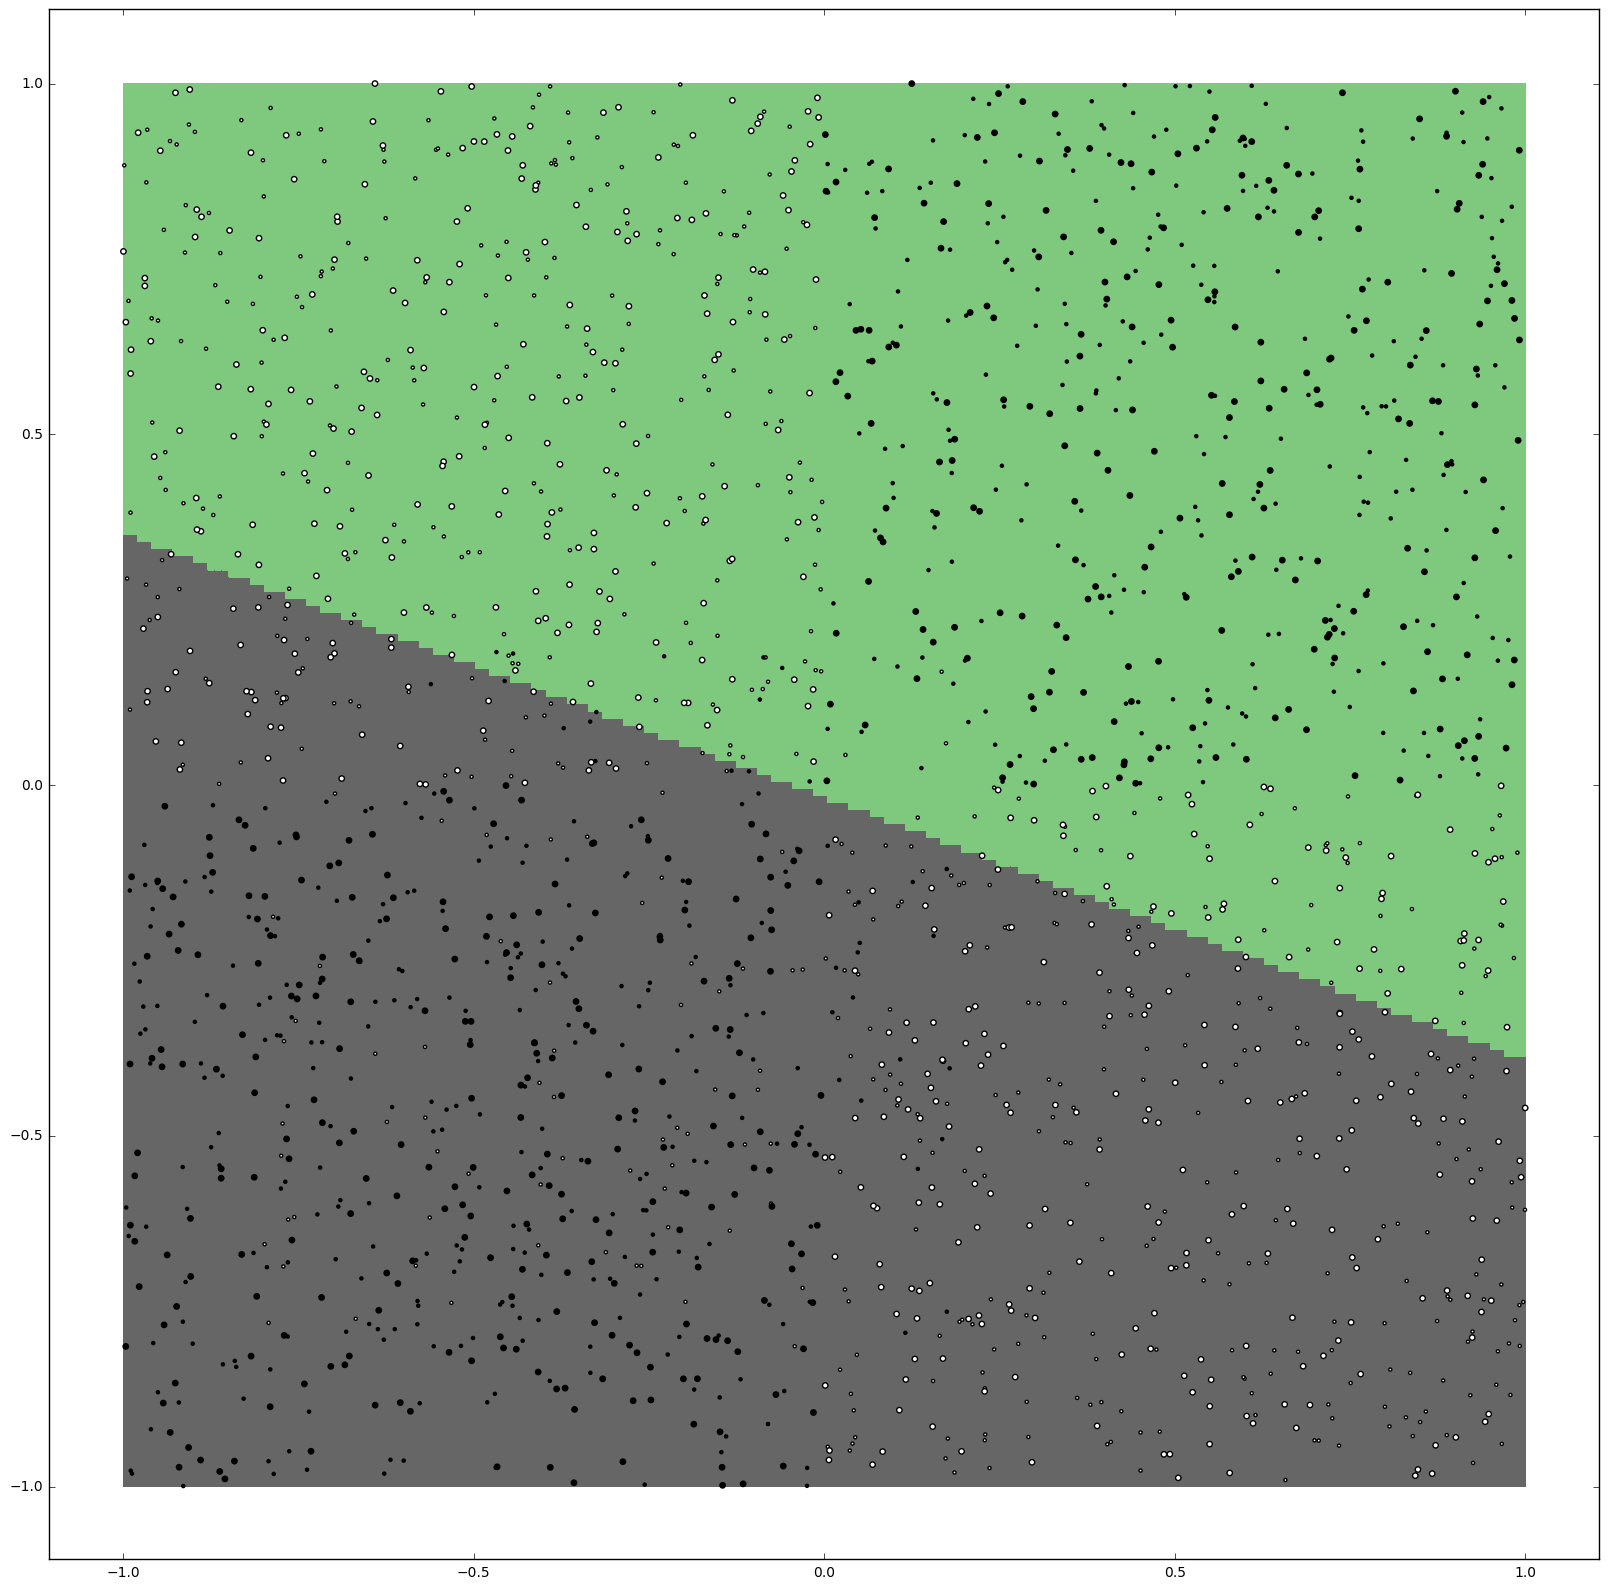

In [12]:
#1.d
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

n_h=1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
print "Entrenando la red neuronal de 1 neurona..."
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]
print ""
print "Test Accuracy = %f"%test_acc
print "Grafico del resultado de la red neuronal de 1 neurona con funcion de activacion sigmoid"
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

Como se puede notar con el grafico resultante, la red neuronal con cero capas escondidas y 1 neurona no es capaz de clasificar bien el problema XOR.

### 2.1.e. Prueba de clasificación con una red neuronal artificial de 1 capa escondida con distintas neuronas.

 992/1000 [============================>.] - ETA: 0s
Test Accuracy con una capa oculta de 2 neuronas = 0.657000
 992/1000 [============================>.] - ETA: 0s
Test Accuracy con una capa oculta de 4 neuronas = 0.708000
1000/1000 [==============================] - 0s     

Test Accuracy con una capa oculta de 8 neuronas = 0.924000
 992/1000 [============================>.] - ETA: 0s
Test Accuracy con una capa oculta de 16 neuronas = 0.969000
 992/1000 [============================>.] - ETA: 0s
Test Accuracy con una capa oculta de 32 neuronas = 0.966000


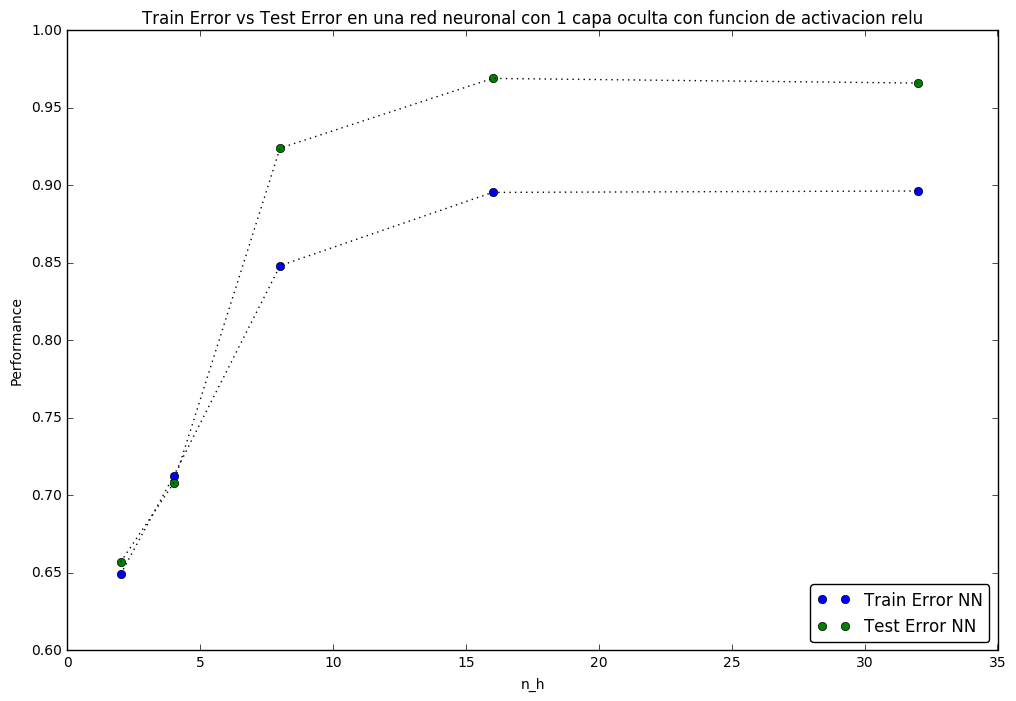

In [16]:
#1.e
from keras.utils.np_utils import to_categorical
N_hs = [2,4,8,16,32]
NN_train = []
NN_test = []

for n_h in N_hs:   
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    scores_tr = model.evaluate(X_train,Y_train)
    train_acc = scores_tr[1]
    scores_t = model.evaluate(X_test, Y_test)
    test_acc = scores_t[1]
    NN_train.append(train_acc)
    NN_test.append(test_acc)
    print ""
    print "Test Accuracy con una capa oculta de %d neuronas = %f"%(n_h,test_acc)
    
plt.figure(figsize=(12, 8))
plt.plot(N_hs,NN_train,'bo',label="Train Error NN")
plt.plot(N_hs,NN_train,'k:')
plt.plot(N_hs,NN_test,'go',label="Test Error NN")
plt.plot(N_hs,NN_test,'k:')
plt.xlabel('n_h')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en una red neuronal con 1 capa oculta con funcion de activacion relu')
leg = plt.legend(loc='lower right', fancybox=True)
plt.show()

Grafico del resultado de la red neuronal con una capa oculta de 2 neuronas con funcion de activacion relu


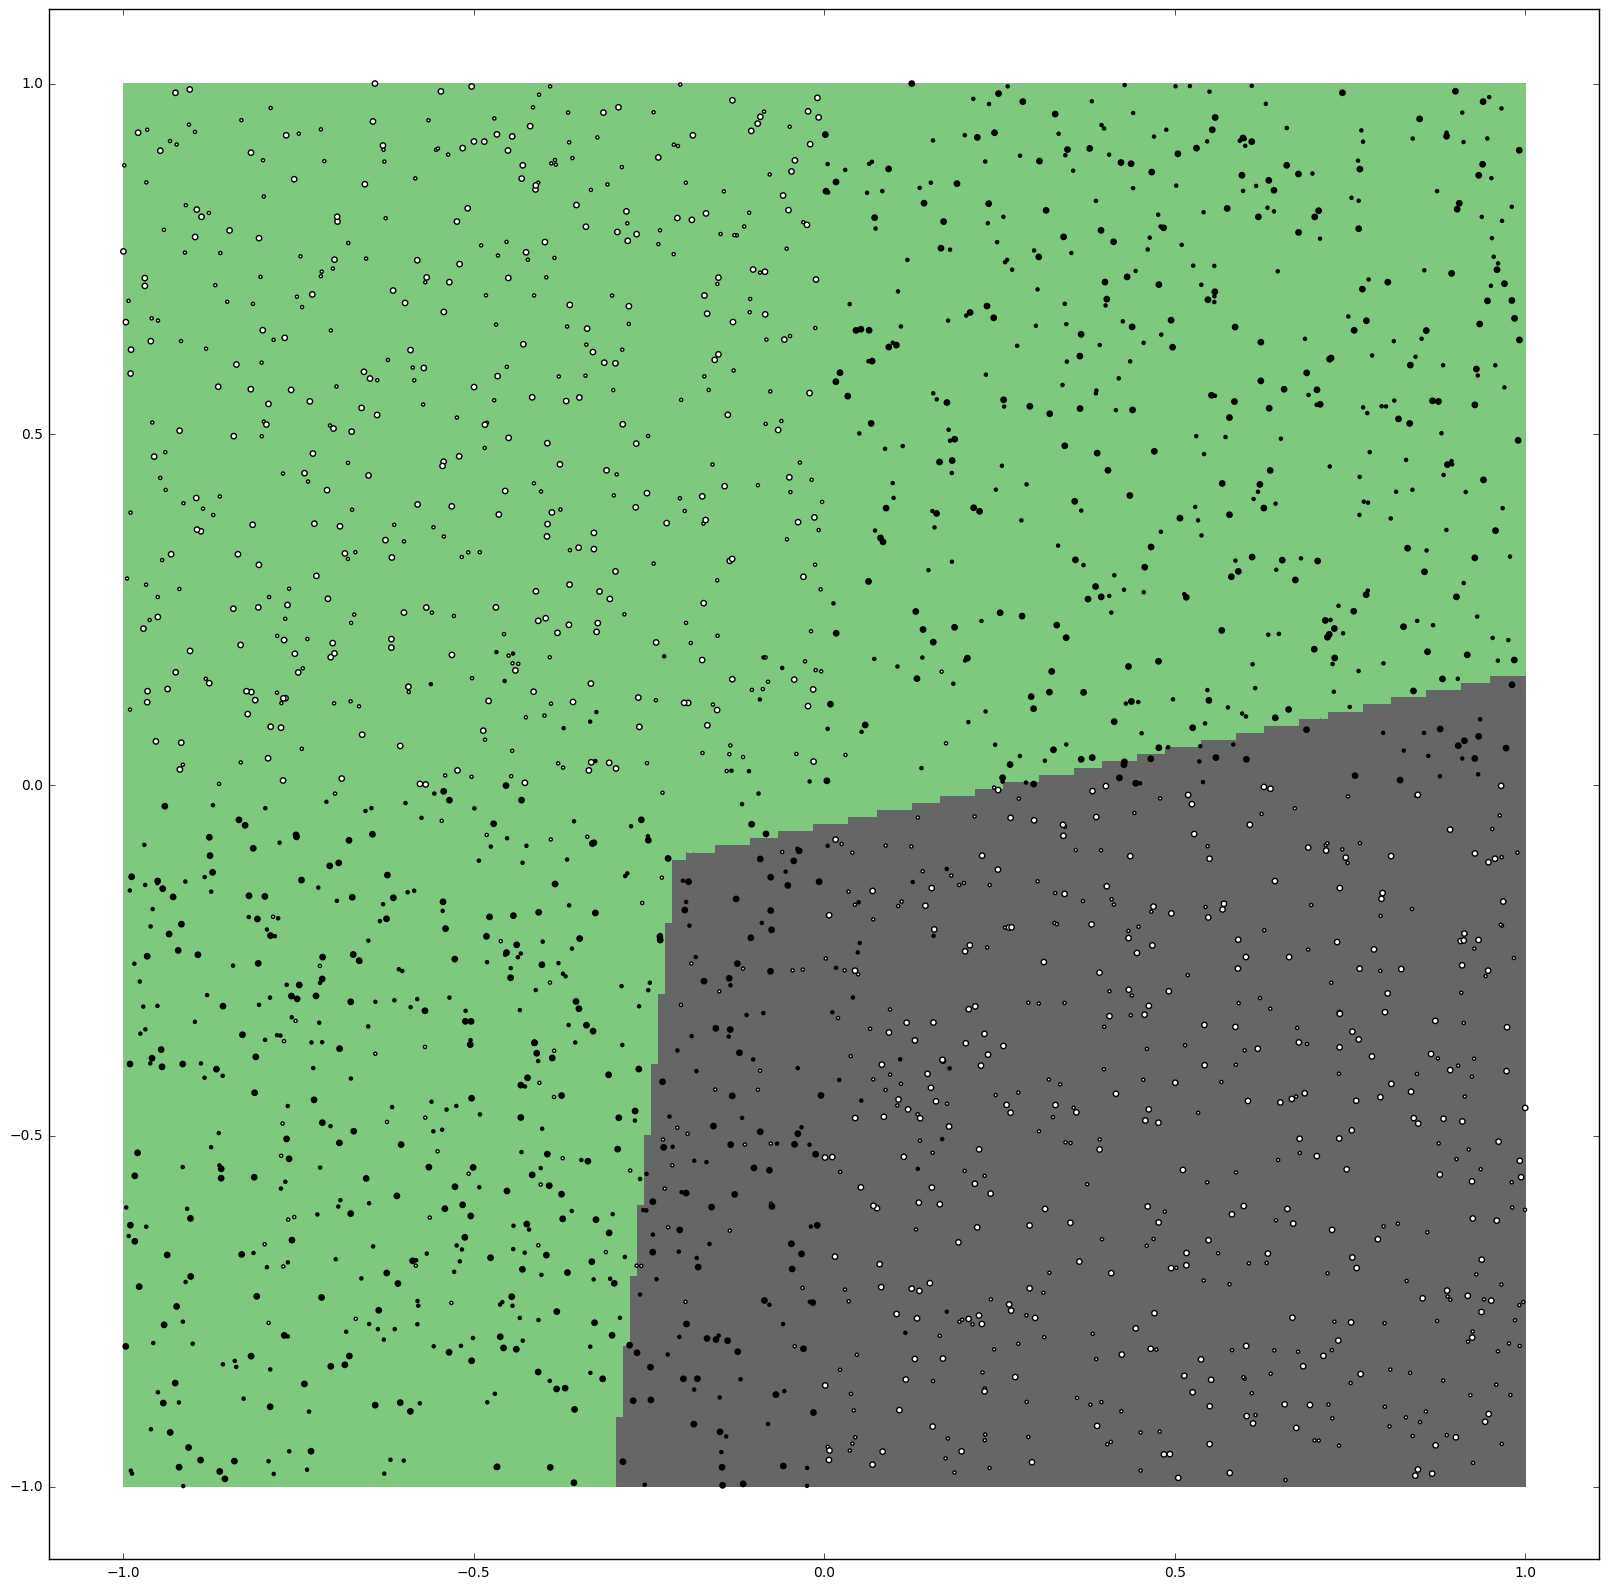

Grafico del resultado de la red neuronal con una capa oculta de 16 neuronas con funcion de activacion relu


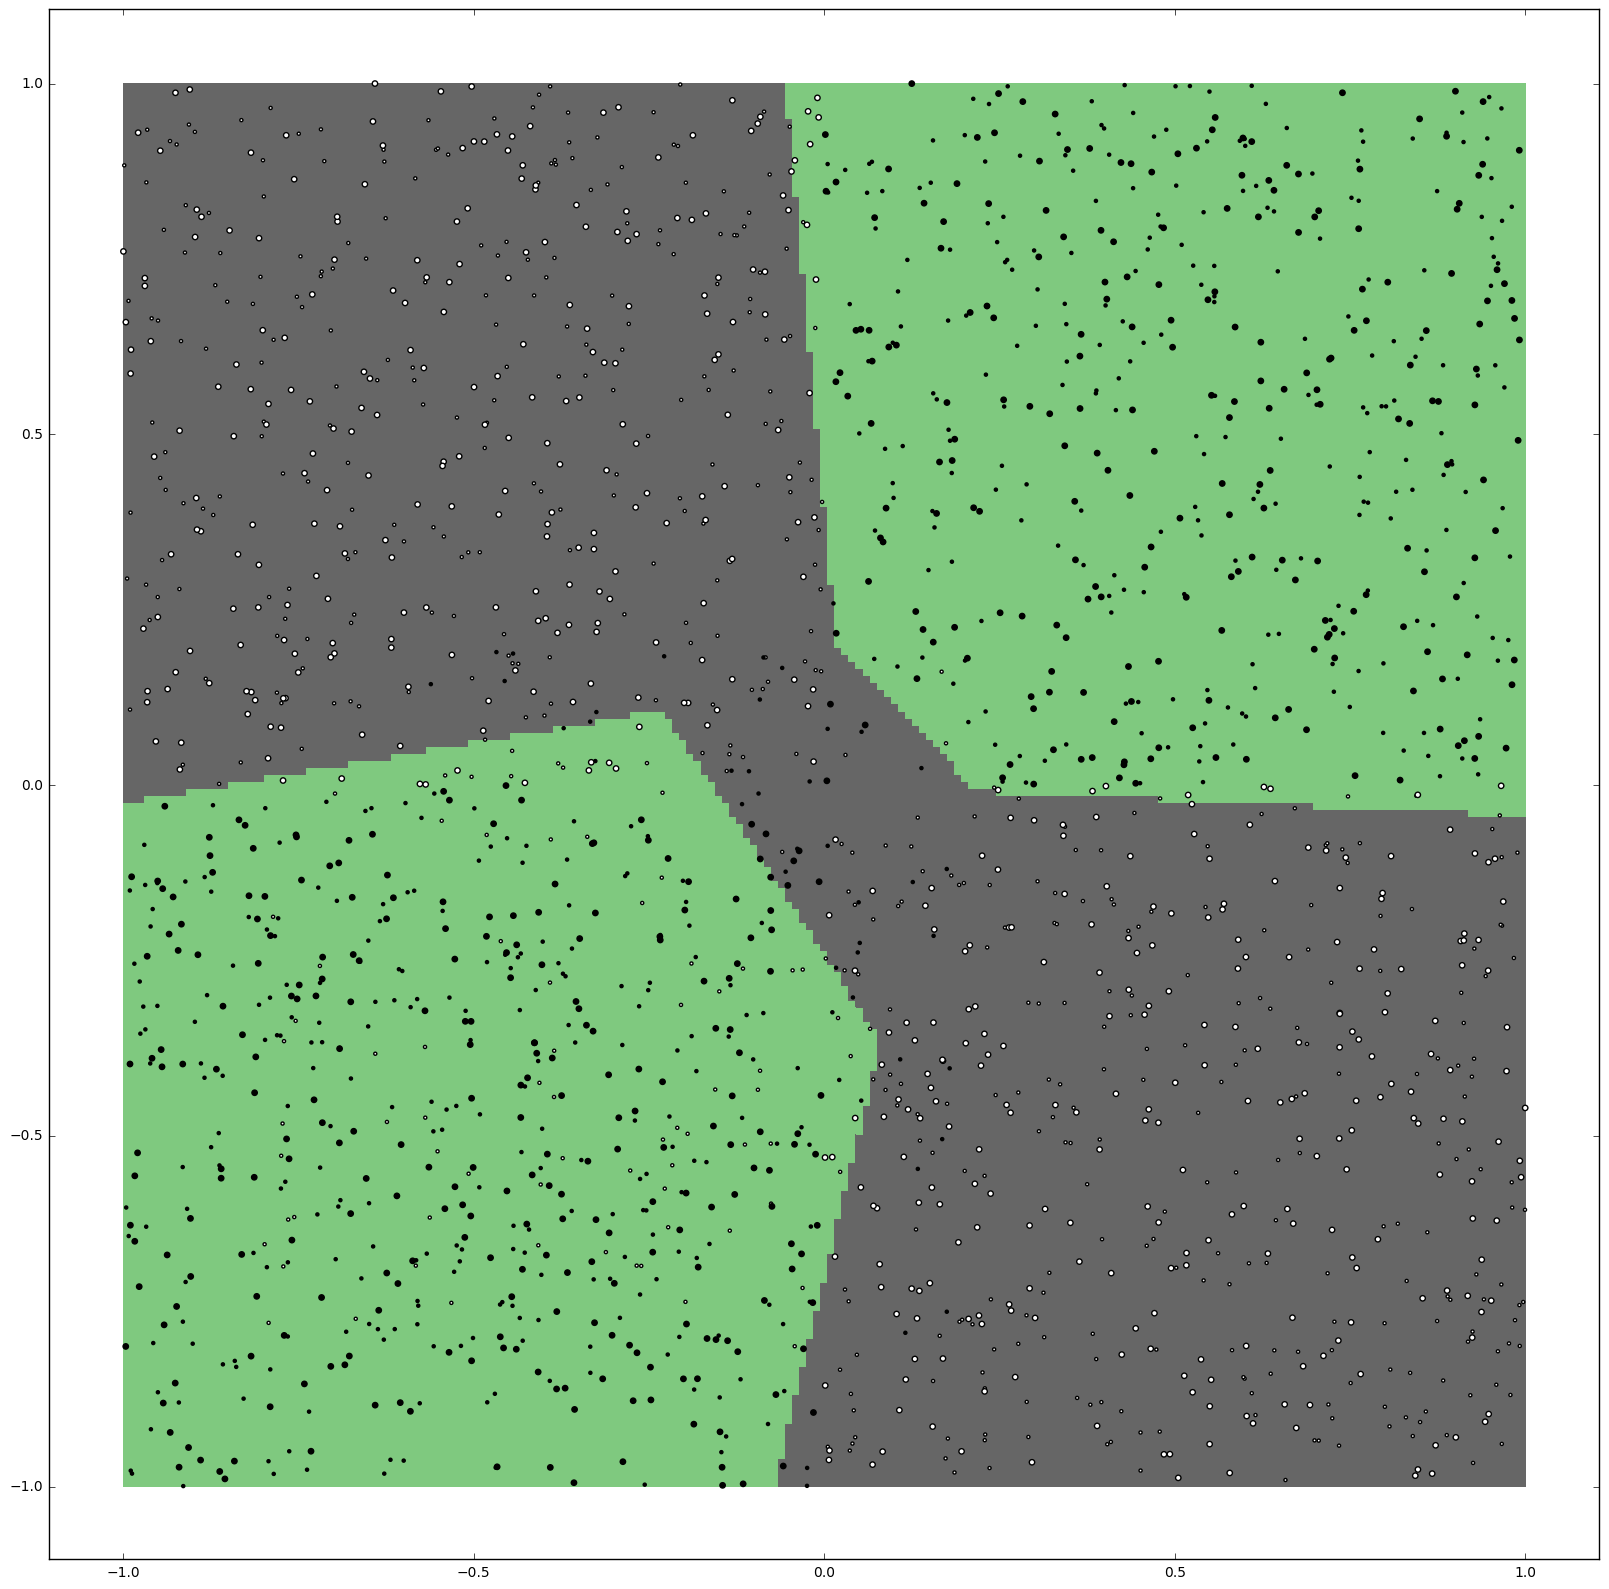

In [18]:
#1.e grafico de las redes neuronales con mejor accuracy
model2 = Sequential()
model2.add(Dense(2, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model2.add(Dense(1, init='uniform', activation='sigmoid'))
model2.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
print "Grafico del resultado de la red neuronal con una capa oculta de 2 neuronas con funcion de activacion relu"
plot_classifier(model2,X_train,Y_train,X_test,Y_test,'ann')

model16 = Sequential()
model16.add(Dense(16, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model16.add(Dense(1, init='uniform', activation='sigmoid'))
model16.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model16.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
print "Grafico del resultado de la red neuronal con una capa oculta de 16 neuronas con funcion de activacion relu"
plot_classifier(model16,X_train,Y_train,X_test,Y_test,'ann')

Grafico del resultado de la red neuronal con una capa oculta de 32 neuronas con funcion de activacion relu


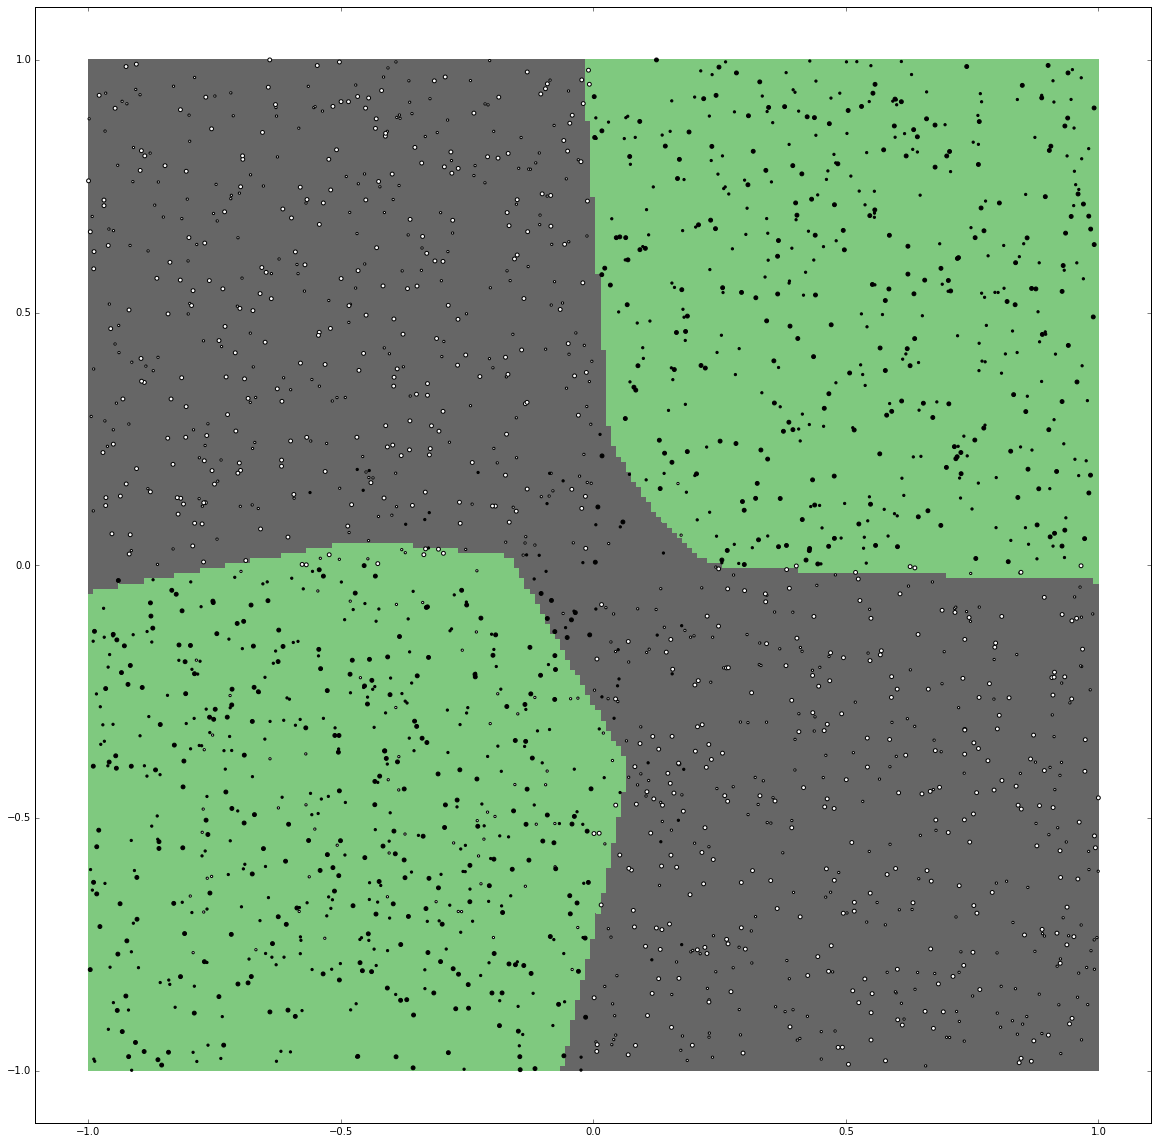

In [11]:
model32 = Sequential()
model32.add(Dense(32, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model32.add(Dense(1, init='uniform', activation='sigmoid'))
model32.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model32.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
print "Grafico del resultado de la red neuronal con una capa oculta de 32 neuronas con funcion de activacion relu"
plot_classifier(model32,X_train,Y_train,X_test,Y_test,'ann')

Como puede notarse en el gráfico del accuracy con los datos de entrenamiento y los de prueba, la red neuronal que mejor rendimiento obtuvo fue la de 32 neuronas en la capa oculta, esto indica que mientras más neuronas tiene la red, mejor clasificara el problema XOR, esto se comprueba comparando el gráfico de clasificación entre 2, 16 y 32 neuronas.

### 2.1.f. Prueba de clasificación con un árbol de clasificación de 1 nivel.

Test Accuracy = 0.489000
1
Training Accuracy Arbol con 1 nivel: 0.541818
Test Accuracy Arbol con 1 nivel: 0.489000
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         -1       0.48      0.67      0.56       489
         +1       0.50      0.32      0.39       511

avg / total       0.49      0.49      0.47      1000



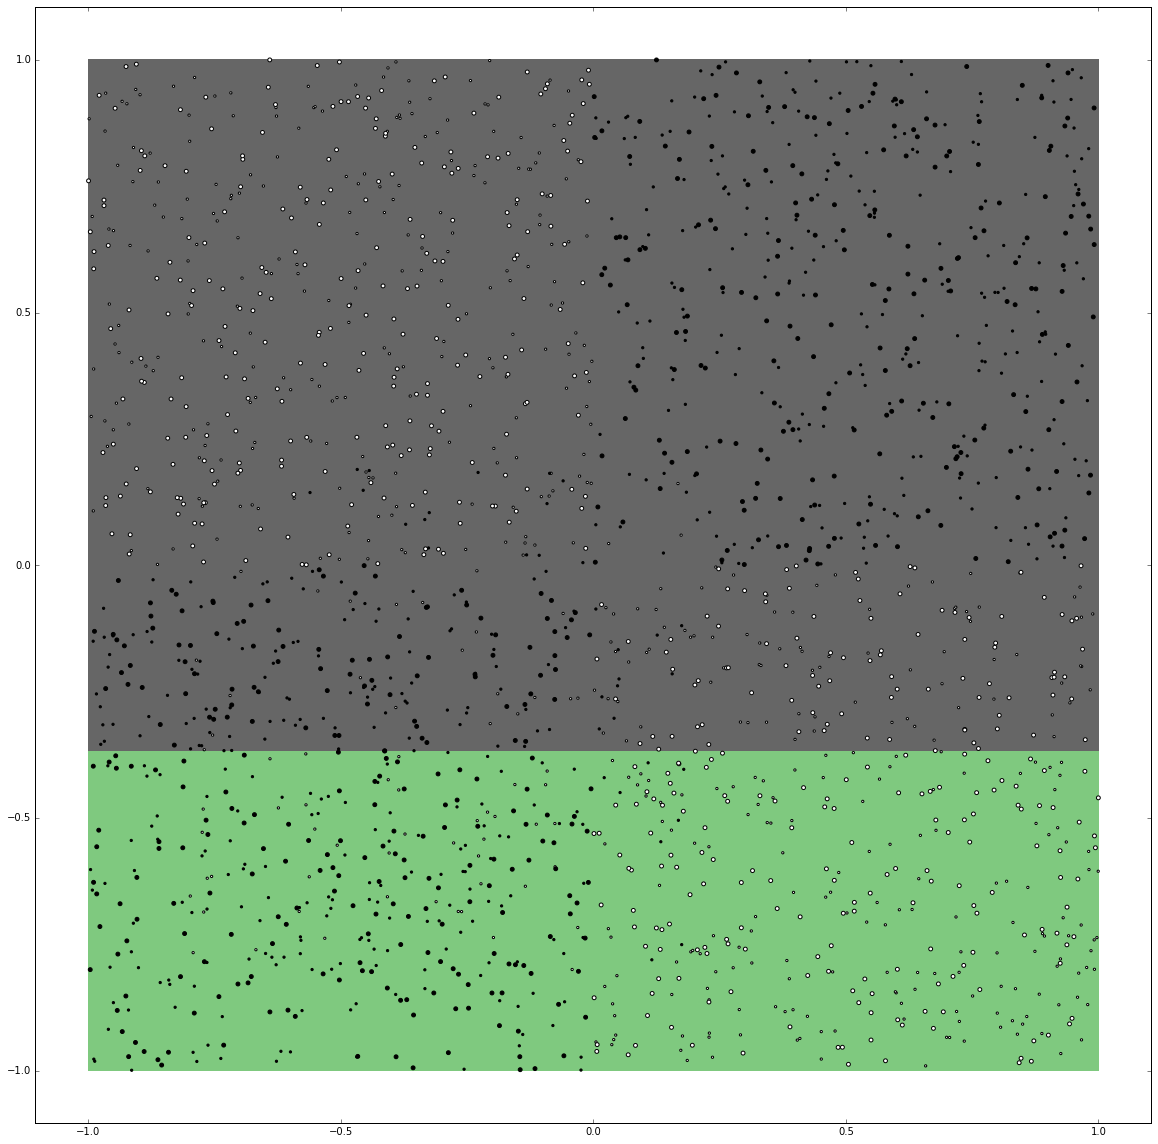

In [12]:
#1.f
from sklearn.tree import DecisionTreeClassifier as Tree
%matplotlib inline
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
score_the_model(clf,X_train,Y_train,X_test,Y_test,'Arbol con 1 nivel')
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Como puede notarse por el grafico, el árbol de clasificación de 1 nivel no es capaz de clasificar correctamente el problema XOR.

### 2.1.g. Prueba de clasificación con un árbol de clasificación de múltiples niveles

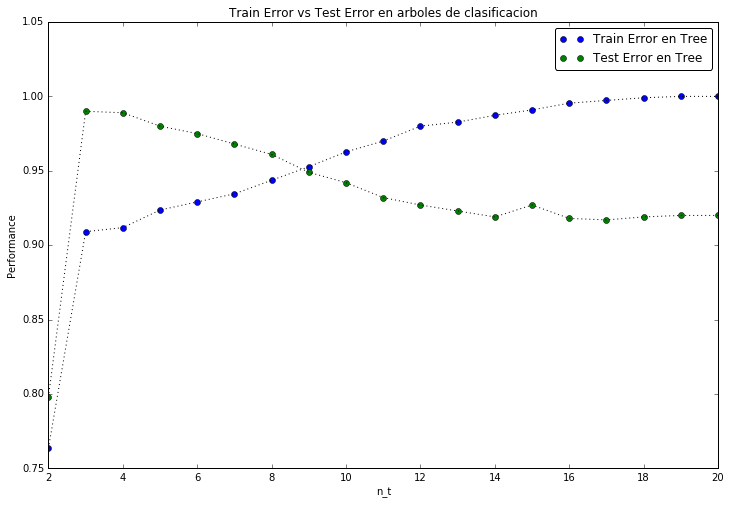

In [13]:
#1.g
from sklearn.tree import DecisionTreeClassifier as Tree
%matplotlib inline

tree_train = []
tree_test = []
for n_t in range(2,21):
    clf = Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
    clf.fit(X_train,Y_train)
    tree_train.append(clf.score(X_train,Y_train))
    tree_test.append(clf.score(X_test,Y_test))
    #print clf.tree_.max_depth

plt.figure(figsize=(12, 8))
plt.plot(range(2,len(tree_train)+2),tree_train,'bo', label="Train Error en Tree")
plt.plot(range(2,len(tree_train)+2),tree_train,'k:')
plt.plot(range(2,len(tree_test)+2),tree_test,'go', label="Test Error en Tree")
plt.plot(range(2,len(tree_test)+2),tree_test,'k:')
plt.xlabel('n_t')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en arboles de clasificacion')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Clasicador Tree con n_t = 3
Test Accuracy = 0.990000


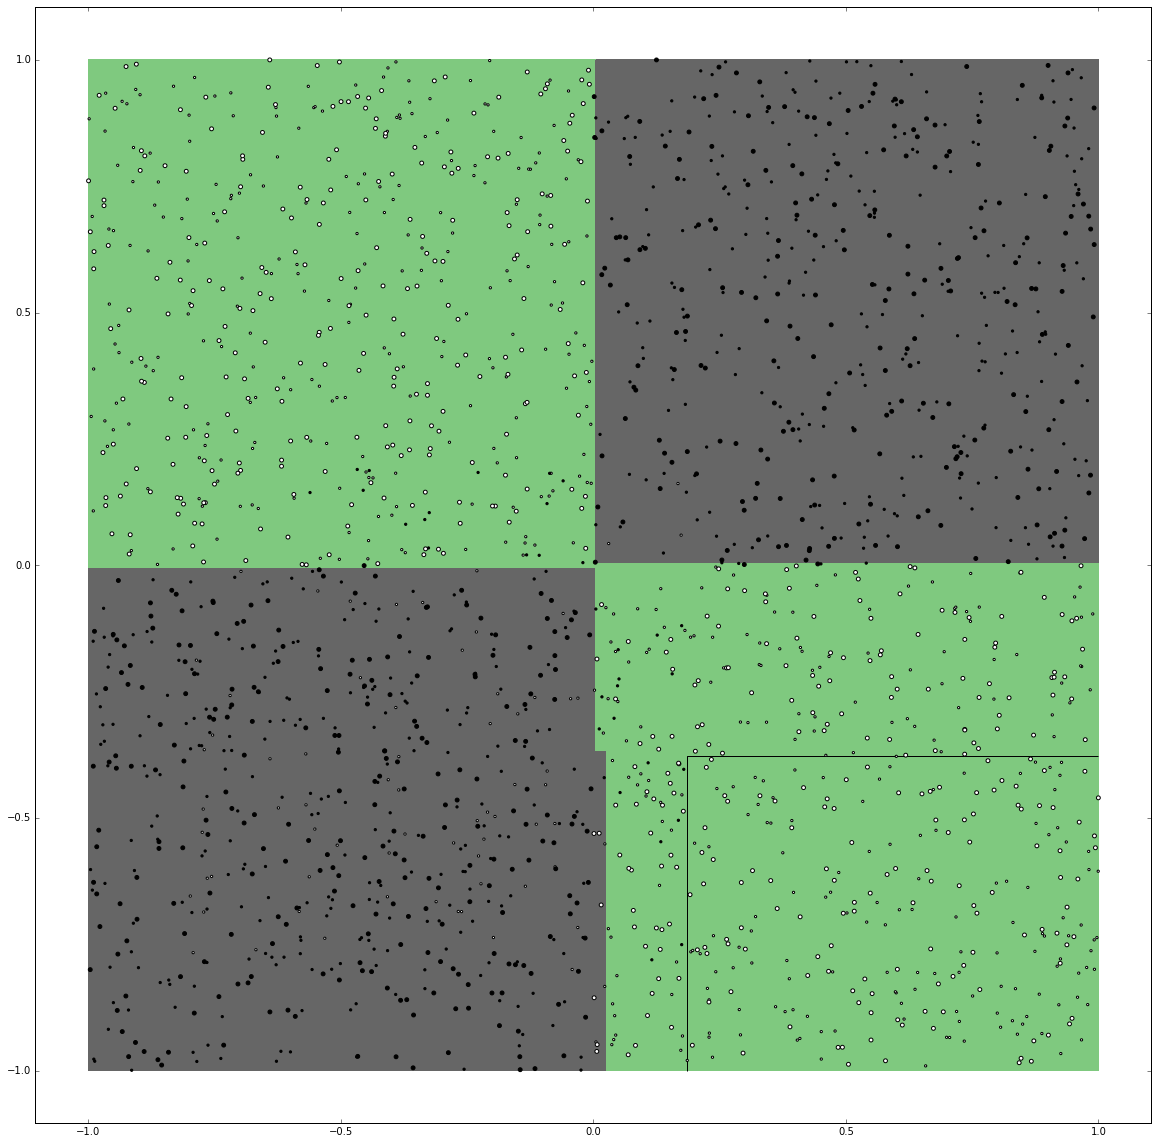

Clasicador Tree con n_t = 9
Test Accuracy = 0.949000


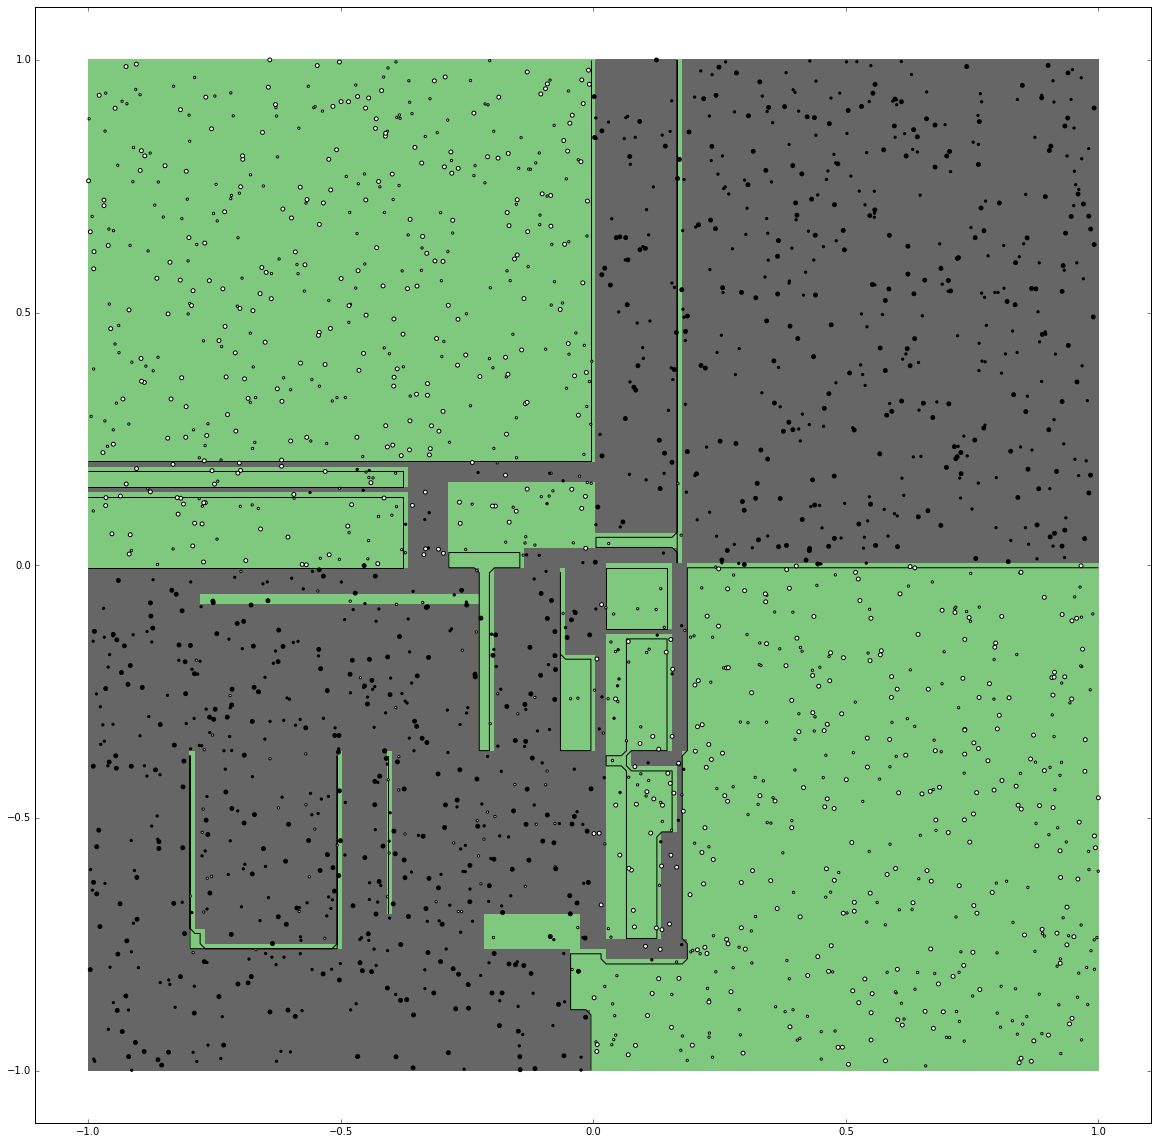

In [14]:
#1.g Graficamos los clasificadores con n_t = [3,9,15]
print "Clasicador Tree con n_t = 3"
clf = Tree(criterion='gini',splitter='best',random_state=0,max_depth=3)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

print "Clasicador Tree con n_t = 9"
clf = Tree(criterion='gini',splitter='best',random_state=0,max_depth=9)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Clasicador Tree con n_t = 15
Test Accuracy = 0.927000


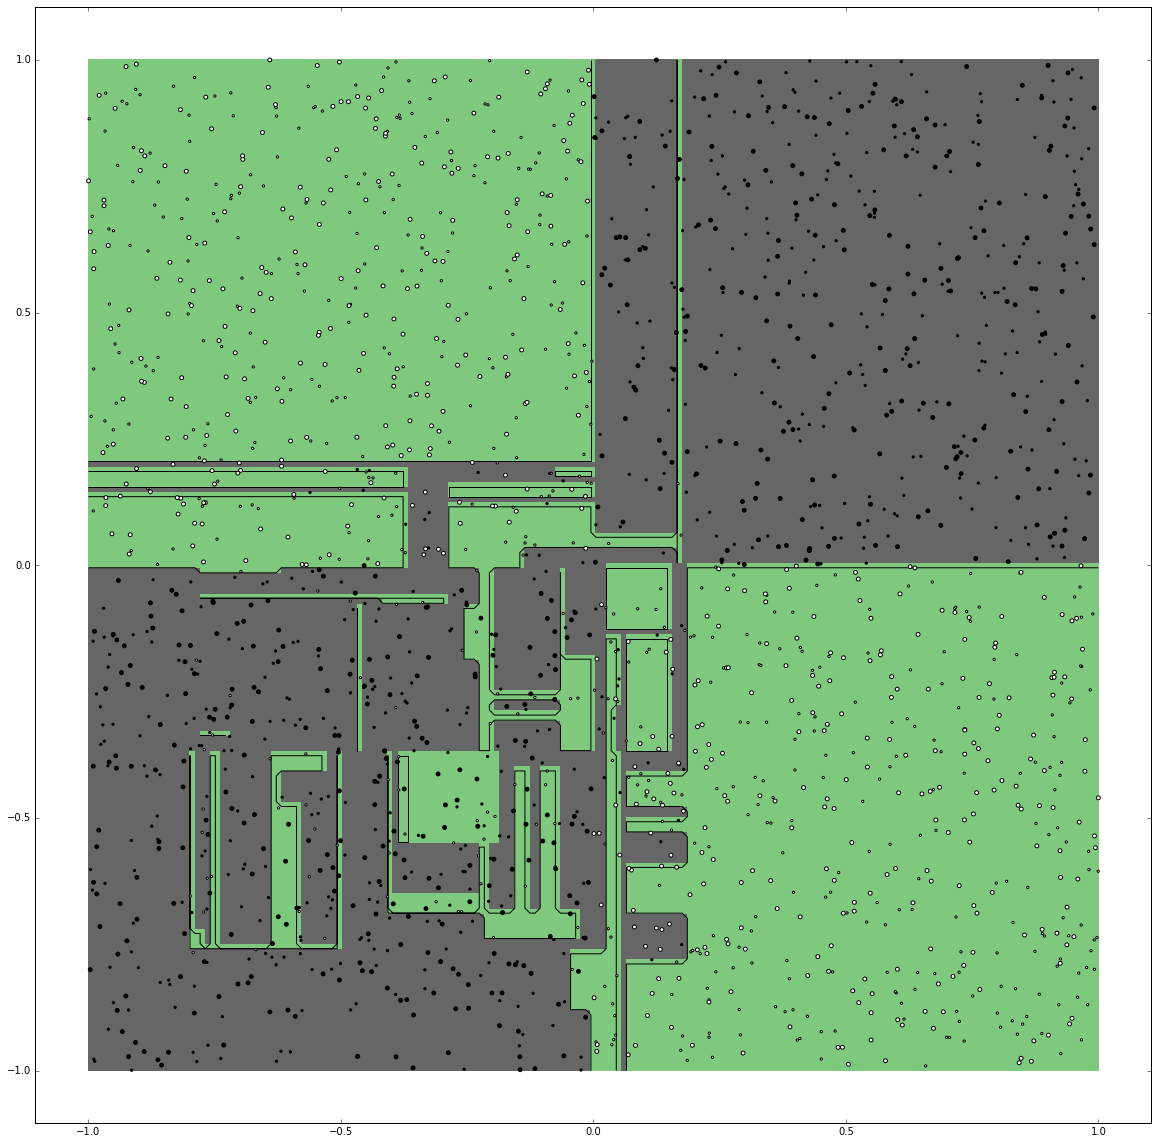

In [15]:
print "Clasicador Tree con n_t = 15"
clf = Tree(criterion='gini',splitter='best',random_state=0,max_depth=15)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Como puede notarse en el gráfico de error en los datos de entrenamiento vs los de prueba, a medida que aumentamos el nivel del árbol, el accuracy en los datos de entrenamiento mejora, pero el de los datos de entrenamiento empeora, esto notoriamente es producto de overfitting, por lo tanto, no es bueno utilizar un árbol de gran altura para clasificar el problema XOR. Uno de los mejores arboles por rendimiento fue el de 3 niveles, donde se obtuvo el mejor rendimiento con los datos de prueba. Por otro lado, con un árbol de clasificación de 9 niveles, el accuracy de train y test fue muy similar. Por ultimo con un árbol de 15 niveles, el accuracy en los datos de prueba fue mejor que sus clasificadores con niveles similares (14 y 16). Se presenta el grafico de estos 3 árboles mencionados anteriormente. 